## **MOVIE RECOMMENDATION SYSTEM USING MACHINE LEARNING**

### **Introduction**
#### <span style="color:darkred">A Movie Recommendation System using Machine Learning is designed to predict and suggest movies that a user may like based on data patterns and user preferences. With the explosion of digital content, machine learning techniques have become essential to process large datasets and provide personalized recommendations efficiently.</span>
#### <span style="color:darkred">Machine learning models can analyze user behavior, movie features, and past interactions to learn hidden patterns and make smart predictions. Common approaches include collaborative filtering (learning from user ratings and similarities), content-based filtering (recommending movies with similar attributes), and hybrid models (combining both techniques).</span>

#### **Dataset Loading**

#### <span style="color:darkred"> Importing libraries (numpy, pandas, matplotlib, seaborn).</span>
#### <span style="color:darkred">Loading the dataset (top10K-TMDB-movies.csv).</span>
#### <span style="color:darkred"> Displaying the first 10 rows, dataset shape, and basic statistics.</span>
#### <span style="color:darkred"> Checking for missing values and dataset information</span>

In [5]:
#impoting libraries
import numpy as np        # Numerical computations
import pandas as pd       # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns            # Advanced statistical visualization

In [7]:
movies=pd.read_csv('top10K-TMDB-movies.csv')

In [9]:
movies.head(10)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
5,667257,Impossible Things,"Family,Drama",es,"Matilde is a woman who, after the death of her...",14.358,2021-06-17,8.6,255
6,129,Spirited Away,"Animation,Family,Fantasy",ja,"A young girl, Chihiro, becomes trapped in a st...",92.056,2001-07-20,8.5,13093
7,730154,Your Eyes Tell,"Romance,Drama",ja,"A tragic accident lead to Kaori's blindness, b...",51.345,2020-10-23,8.5,339
8,372754,Dou kyu sei – Classmates,"Romance,Animation",ja,"Rihito Sajo, an honor student with a perfect s...",14.285,2016-02-20,8.5,239
9,372058,Your Name.,"Romance,Animation,Drama",ja,High schoolers Mitsuha and Taki are complete s...,158.270,2016-08-26,8.5,8895


In [11]:
movies.shape

(10000, 9)

In [13]:
movies.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


### **Data Cleaning**

#### <span style="color:darkred"> Selecting relevant columns (id, title, overview, genre).</span>
#### <span style="color:darkred"> Combining overview and genre into a new column tags for feature extraction.</span>
#### <span style="color:darkred"> Dropping redundant columns (overview, genre).</span>
#### <span style="color:darkred"> Handling missing values (if any; noted as 3 missing genre and 13 missing overview).</span>

In [19]:
movies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [21]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [23]:
movies=movies[['id', 'title', 'overview', 'genre']]

In [25]:
movies

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [27]:
movies['tags'] = movies['overview']+movies['genre']

In [29]:
movies

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [31]:
new_data  = movies.drop(columns=['overview', 'genre'])

In [33]:
new_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


### **Visualization**

C:\Users\user\AppData\Local\Temp\ipykernel_12860\941844230.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


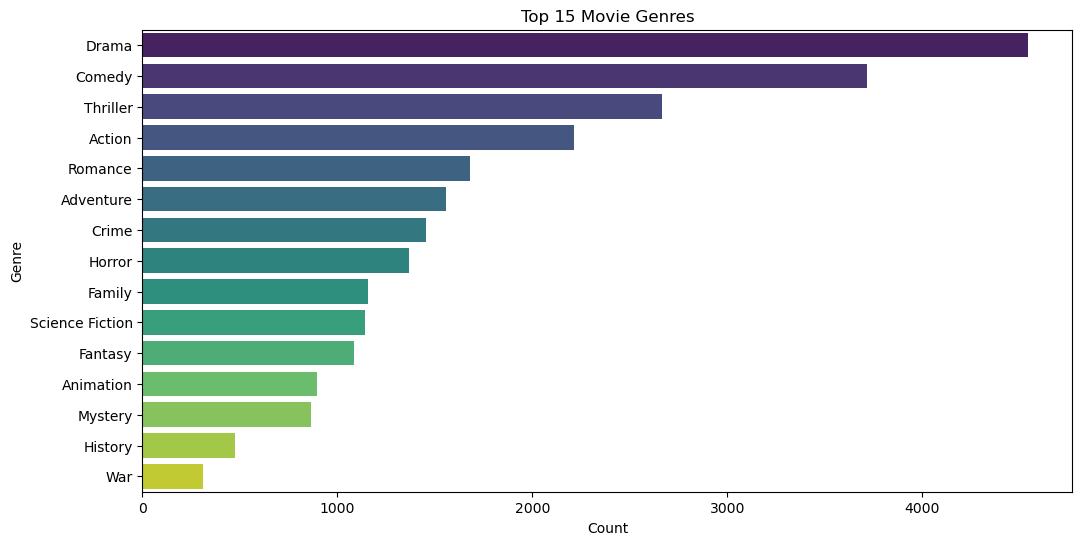

In [36]:
# Split genres and count occurrences
genres = movies['genre'].str.split(',').explode().str.strip()
genre_counts = genres.value_counts().head(15)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 15 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_12860\1504200894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


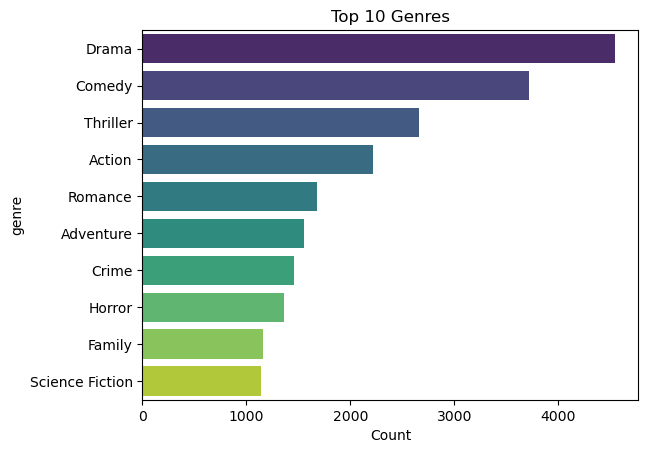

In [38]:
# Count genres
genres = movies['genre'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

# Plot
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.show()

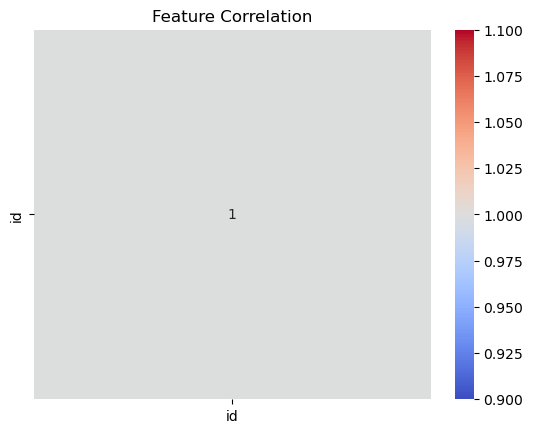

In [40]:
# Select numeric columns
numeric_data = movies.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### Movie Timeline with Ratings

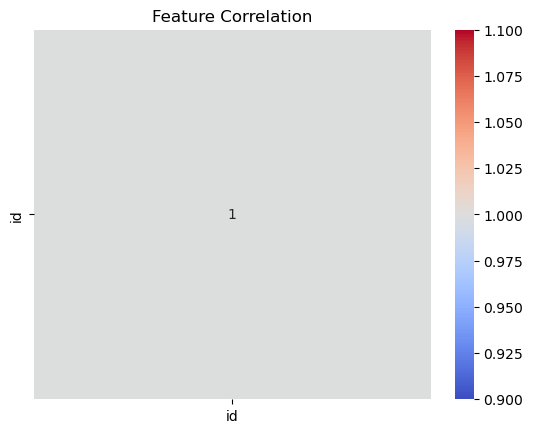

In [43]:
# Select numeric columns
numeric_data = movies.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### **Feature Engineering**

#### <span style="color:darkred"> Using CountVectorizer to convert tags into a bag-of-words matrix.</span>
#### <span style="color:darkred"> Limiting features to 10,000 and removing English stopwords.</span>
#### <span style="color:darkred">Generating a similarity matrix using cosine_similarity.</span>

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
cv=CountVectorizer(max_features=10000, stop_words='english')

In [51]:
cv

CountVectorizer(max_features=10000, stop_words='english')

In [53]:
vector=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [54]:
vector.shape

(10000, 10000)

### **Machine Learning Algorithm**

#### <span style="color:darkred">Defining a function recommand(movies) to find similar movies:</span>
#### <span style="color:darkred">Fetching the index of the input movie.</span>
#### <span style="color:darkred">Sorting movies based on cosine similarity scores.</span>
#### <span style="color:darkred">Returning the top 5 most similar movies.</span>
#### <span style="color:darkred">Example: Testing the function with Iron Man</span>

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
similarity=cosine_similarity(vector)

In [62]:
similarity

array([[1.        , 0.05634362, 0.12888482, ..., 0.07559289, 0.11065667,
        0.06388766],
       [0.05634362, 1.        , 0.07624929, ..., 0.        , 0.03636965,
        0.        ],
       [0.12888482, 0.07624929, 1.        , ..., 0.02273314, 0.06655583,
        0.08645856],
       ...,
       [0.07559289, 0.        , 0.02273314, ..., 1.        , 0.03253   ,
        0.02817181],
       [0.11065667, 0.03636965, 0.06655583, ..., 0.03253   , 1.        ,
        0.0412393 ],
       [0.06388766, 0.        , 0.08645856, ..., 0.02817181, 0.0412393 ,
        1.        ]])

In [63]:
new_data[new_data['title']=="The Godfather"].index[0]

2

In [64]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:5]:
    print(new_data.iloc[i[0]].title)

The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City


In [65]:
def recommand(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:5]:
        print(new_data.iloc[i[0]].title)

In [66]:
recommand("Iron Man")

Iron Man
Iron Man 3
Guardians of the Galaxy Vol. 2
Avengers: Age of Ultron
Star Wars: Episode III - Revenge of the Sith


### **Model Export**

#### <span style="color:darkred"> Exporting the processed dataset (movies_list.pkl) and similarity matrix (similarity.pkl) using pickle.</span>
#### <span style="color:darkred"> Verifying the exported files by loading them back.</span>

In [69]:
import pickle

In [70]:
pickle.dump(new_data, open('movies_list.pkl', 'wb'))

In [71]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [72]:
pickle.load(open('movies_list.pkl', 'rb'))

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


### **Conclusion**

#### <span style="color:darkred">The Movie Recommendation System developed in this project leverages content-based filtering to suggest films based on similarity in plot summaries (overview) and genres. By preprocessing the data (combining text features and vectorizing them with CountVectorizer), we created a similarity matrix using cosine similarity, which measures how closely movies align in their thematic elements. The system successfully recommends relevant movies, as demonstrated by the example query for Iron Man, which returned other action-packed films like Iron Man 3 and Guardians of the Galaxy Vol. 2.</span>

### Key Takeaways:
#### <span style="color:darkred"> Text Data is Powerful: Simple NLP techniques (bag-of-words) can effectively capture movie similarities.</span>
#### <span style="color:darkred"> Scalability: The model handles 10,000 movies efficiently, but could benefit from dimensionality reduction (e.g., TF-IDF) for larger datasets.</span>

### Future Enhancements:
#### <span style="color:darkred"> Incorporate user ratings (collaborative filtering) for personalized recommendations.</span>
#### <span style="color:darkred"> Deploy the system as a web app using Flask/Streamlit for user interaction.</span>
#### <span style="color:darkred"> Add sentiment analysis of reviews to refine recommendations  </span>  

### <span style="color:darkred"> Final Thought: This project lays a strong foundation for building more sophisticated recommendation systems, bridging the gap between data science and user experience in entertainment platforms. By visualizing genre trends and word frequencies, we further validate the robustness of the underlying methodology.</span>

